Maximum A Posteriori (MAP) Estimation at Casino Evil 
----

<br>
<center><img src="images/evil.png" width="400"/></center>

You and your pair have decided to go to Nevada after graduation but are too poor to go to Las Vegas. You ended up in Fallon, NV at __Casino Evil__😈.

The first game you play is a coin flipping game. But you think Casino Evil might be using unfair coins.

We are going to create MAP estimates to model that Bernoulli distribution. 

For MAP we need some kind of prior, the beta distribution is the conjugate prior probability distribution for the Bernoulli distribution.

For example, the beta distribution can be used in Bayesian analysis to describe initial prior knowledge concerning probability of success (e.g., bias of a coin towards heads).

In [71]:
reset -fs

SymPy
-----

SymPy is a Python library for symbolic mathematics. It will help us with the symbolic calculus.

__TODO__: Install sympy

$ pip install sympy

--------

In [72]:
import sympy
from sympy import stats as st
from sympy.abc import p,k,n

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

%matplotlib inline

I have written the objective function for you.

__TODO__: Please comment each line

In [73]:
α = 6
β = 6
objective = sympy.expand_log(sympy.log(p**k*(1-p)**(n-k)* 
                             st.density(st.Beta('p', α, β))(p)))

In [74]:
# Solution
α = 6
β = 6
objective = sympy.expand_log(sympy.log(p**k*(1-p)**(n-k)* # Log of the Bernoulli distribution
                             st.density(st.Beta('p', α, β))(p))) # The prior

__TODO__: Plot the Beta Distrubtion prior

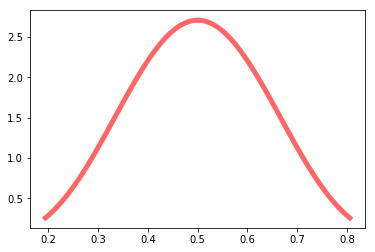

In [75]:
# Solution

x = np.linspace(beta.ppf(0.01, α, β),
                 beta.ppf(0.99, α, β), 100)
plt.plot(x, beta.pdf(x, α, β ),
            'r-', lw=5, alpha=0.6, label='beta pdf');


__TODO__: What does this prior suggest about our beliefs?

__Solution__: Mostly like to get a fair coin, but there could be bias coin.

Let's use calculus to maximize objective

In [76]:
max_objective = sympy.solve(sympy.simplify(sympy.diff(objective,p)),p)[0]
print(max_objective)

(k + 5)/(n + 10)


__TODO__: What is k and n?

__Solution__

k is the number of heads in the sample

n is the number of flips

__TODO__: Write the MAP estimator for θ

__Solution__:

$$
\hat{\theta}_{MAP} = \frac{k+5}{n+10}
$$

__TODO__: Is this a bias estimator of θ? Does that result make intuitive sense?

<br>
<details><summary>
Click here for a hint…
</summary>
What is the expected value of θ?
</details>

__Solution__: Hell Yeah! 

$$
\mathbb{E}(\hat{\theta}_{MAP}) = \frac{5+n \theta}{10 +n} \neq \theta
$$

We constructed bias Remember that we constructed this entire estimator using the idea of the prior probability of $\mathbb{P}(\theta)$ which *favors* (biases!) the estimate according to the prior.  

__TODO__: Calculate the maximum likelihood (ML) estimator for θ:

__Solution__:
$$
\hat{\theta}_{ML} = \frac{1}{n} \sum_{i=1}^n X_i =  \frac{k}{n}
$$

__TODO__: How does the MAP and MLE θs compare?

__Solution__: MLE is always unbiased but we can't wieght our prior.

__TODO__: Change the Beta distribution so MAP will return the same estimate as MLE:

In [77]:
# Solution
α = 1
β = 1
objective = sympy.expand_log(sympy.log(p**k*(1-p)**(n-k)* 
                             st.density(st.Beta('p', α, β))(p)))

__TODO__: Plot this Beta Distrubtion prior

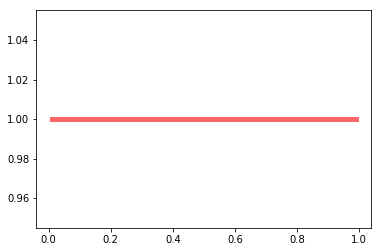

In [78]:
# Solution
x = np.linspace(beta.ppf(0.01, α, β),
                 beta.ppf(0.99, α, β), 100)
plt.plot(x, beta.pdf(x, α, β ),
            'r-', lw=5, alpha=0.6, label='beta pdf');

__TODO__: What does this prior suggest about our beliefs?

__Solution__: There is no bias in our beliefs

__TODO__: Redo the caculus to to maximize the objective

In [79]:
max_objective = sympy.solve(sympy.simplify(sympy.diff(objective, p)),p)[0]
print(max_objective)

k/n


__TOD0__ For which Θ does MLE equal MAP?

__Solution__:

For example, if $\theta=1/2$, the MAP estimator
evaluates to $\hat{\theta}_{MAP}=1/2$.

No bias there! 

---
Future Directions
-----

We can use the previous posterior distribution as the prior for the next posterior distribution,

> “Today's posterior is tomorrow's prior”   
> — Lindley

$$
\mathbb{P}(\theta|x_{k+1}) = \frac{\mathbb{P}(x_{k+1}|\theta)\mathbb{P}(\theta|x_k)}{\mathbb{P}(x_{k+1})}
$$

We can us every data sample $x_k$ as a parameter for the posterior distribution instead of lumping all the samples together in a summation (this is where we got the $k$ term in the prior case). 

This case is much harder to analyze because now every incremental posterior distribution is itself a random function because of the injection of the $x$ random variable. 

On the other hand, this is more in line with more general Bayesian methods because it is clear that the output of this estimation process is a posterior distribution function, not just a single parameter estimate. 

-----
Challenge Exercises
------

__TODO__: Calculte the variance of MAP estimate

__Solution__:

$$
\mathbb{V}(\hat{\theta}_{MAP}) = \frac{n (1-\theta) \theta}{(n+10)^2}
$$


__TODO__: Calculte the variance of MLE estimate

__Solution__:

This is because the peak of the prior probability is at $\theta=1/2$. 

$$
\mathbb{V}(\hat{\theta}_{ML}) = \frac{\theta(1-\theta)}{n}
$$

__TODO__: Find the ratio of two variances

__Solution__:

$$
\frac{\mathbb{V}(\hat{\theta}_{MAP})}{\mathbb{V}(\hat{\theta}_{ML})}=\frac{n^2}{(n+10)^2}
$$

__TODO__: What does the ratio tell use about two estimators?

__Solution__:

This ratio shows that the variance for the MAP-estimator is smaller
than that of the the ML-estimator.

__TODO__: What can infer based on the ratio of two variances?

__Solution__:

This is payoff for having a biased MAP-estimator --- it requires fewer samples to estimate if the underlying parameter is consistent with the prior probability. 

If not, then it will take more samples to pull the estimator away from the bias. In the limit as $n \rightarrow \infty$, the ratio goes to one.  This means that the benefit of the reduced variance vanishes with enough samples. 

This shows a level of arbitrariness via the prior distribution. 

However, we can update our prior!

<br>
----